<a href="https://colab.research.google.com/github/Appachan10/AICity-2020-CETCVLAB/blob/master/Cifar10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  CNN model for the CIFAR-10 Dataset
#import packages
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [ ]:

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 271us/step - loss: 1.9338 - accuracy: 0.2900 - val_loss: 1.6712 - val_accuracy: 0.3958
Epoch 2/10
50000/50000 [==============================] - 7s 144us/step - loss: 1.5419 - accuracy: 0.4353 - val_loss: 1.4170 - val_accuracy: 0.4864
Epoch 3/10
50000/50000 [==============================] - 7s 143us/step - loss: 1.3831 - accuracy: 0.4995 - val_loss: 1.2811 - val_accuracy: 0.5370
Epoch 4/10
50000/50000 [==============================] - 7s 143us/step - loss: 1.2792 - accuracy: 0.5383 - val_loss: 1.1961 - val_accuracy: 0.5767
Epoch 5/10
50000/50000 [==============================] - 7s 144us/step - loss: 1.1986 - accuracy: 0.5684 - val_loss: 1.1324 - val_accuracy: 0.5988
Epoch 6/10
50000/50000 [==============================] - 7s 143us/step - loss: 1.1328 - accuracy: 0.5929 - val_loss: 1.0740 - val_accuracy: 0.6145
Epoch 7/10
50000/50000 [==============================] - 7s 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.53%


Text(0.5, 1.0, 'ship')

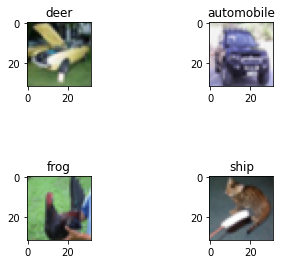

In [ ]:
classes_cifar = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(3,2,1)
plt.imshow(X_test[9998])
plt.title(classes_cifar[np.argmax(model.predict(X_test[9998:9999])[0], axis=0)])
plt.subplot(3,2,2)
plt.imshow(X_test[9])
plt.title(classes_cifar[np.argmax(model.predict(X_test[9:10])[0], axis=0)])
plt.subplot(3,2,5)
plt.imshow(X_test[25])
plt.title(classes_cifar[np.argmax(model.predict(X_test[25:26])[0], axis=0)])
plt.subplot(3,2,6)
plt.imshow(X_test[106])
plt.title(classes_cifar[np.argmax(model.predict(X_test[106:107])[0], axis=0)])

In [ ]:
 print model.predict(X_test[9]

SyntaxError: ignored